# MovieLens Dataset

## MovieLens 100k

In this notebook you will work with the well known [MovieLens 100k](http://grouplens.org/datasets/movielens/) data set that has moving rating for 100,000 movies.

The `prefix` should be set to the directory where the `ml-100k` data set is. Don't forget to use backslashes on Windows!

In [1]:
prefix = '/data/movielens-100k/ml-100k/'

In [2]:
pre='http://files.grouplens.org/datasets/movielens/ml-100k/u.user'

## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os

## Users

Use `pandas.read_csv` to read the `u.user` file as a Pandas `DataFrame` named `users`. See the tests below for the column names to use.

In [4]:
users=pd.read_csv(pre,names=['user_id', 'age' , 'gender', 'occupation', 'zip'],header=None,sep='|',index_col='user_id')

Tidy the `users` table to get it to pass the tests below.

In [5]:
users['gender']=users['gender'].astype('category')

In [6]:
users['occupation']=users['occupation'].astype('category')

In [7]:
users.head()

,age,gender,occupation,zip
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [8]:
assert len(users)==943
assert list(users.columns)==['age','gender','occupation','zip']
assert users.index.name=='user_id'
assert users.age.dtype.name=='int64'
assert users.gender.dtype.name=='category'
assert users.occupation.dtype.name=='category'

Make an appropriately labeled `countplot` with the `occupation` on the y-axis and the `gender` as the hue:

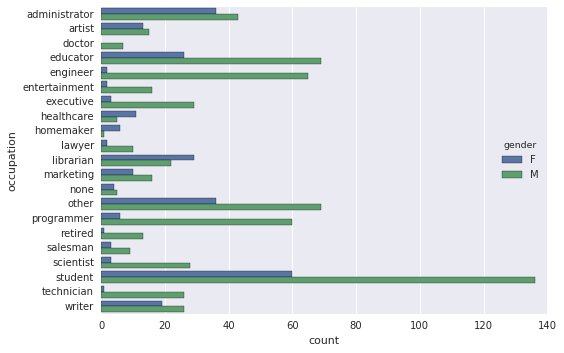

In [9]:
sns.countplot(y="occupation",hue='gender',data=users)

Make an appropriately labeled `distplot` of the `age` column:

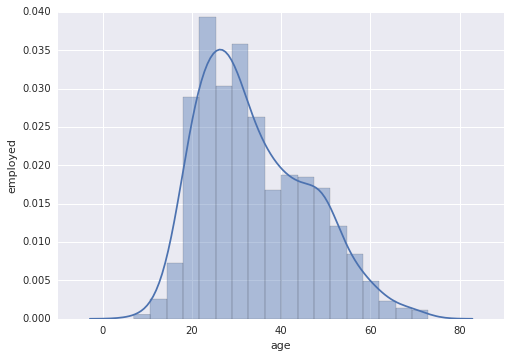

In [10]:
sns.distplot(users['age'])
plt.ylabel('employed')
plt.xlabel('age')
plt.show()

## Genres

Use `pandas.read_csv` to read the `u.genre` file as a Pandas `DataFrame` named `genres`. See the tests below for the column names to use.

In [11]:
http_genre='http://files.grouplens.org/datasets/movielens/ml-100k/u.genre'

In [12]:
genres=pd.read_csv(http_genre,names=['genre', 'genre_id'],header=None,sep='|',index_col='genre_id')

Tidy the `genres` table to get it to pass the tests below.

In [13]:
genres['genre']=genres['genre'].astype('category')

In [14]:
genres.head()

,genre
genre_id,
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's


In [15]:
assert len(genres)==19
assert genres.index.name=='genre_id'
assert list(genres.columns)==['genre']
assert genres.genre.dtype.name=='category'

## Ratings

Use `pandas.read_csv` to read the `u.data` file as a Pandas `DataFrame` named `ratings`. See the tests below for the column names to use.

In [16]:
http_genre='http://files.grouplens.org/datasets/movielens/ml-100k/u.data'

In [17]:
ratings=pd.read_csv(http_genre,names=['user_id','movie_id','rating','timestamp'],header=None,sep='\t')

In [18]:
ratings['user_id']=ratings['user_id'].astype('int64')
ratings['movie_id']=ratings['movie_id'].astype('int64')
ratings['rating']=ratings['rating'].astype('int64')
ratings['timestamp']=ratings['timestamp'].astype('int64')

In [19]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [20]:
assert len(ratings)==100000
assert ratings.user_id.dtype.name=='int64'
assert ratings.movie_id.dtype.name=='int64'
assert ratings.rating.dtype.name=='int64'
assert ratings.timestamp.dtype.name=='int64'

## Movies

Use `pandas.read_csv` to read the `u.item` file as a Pandas `DataFrame` named `movies`. See the tests below for the column names to use.

In [21]:
http_movies='http://files.grouplens.org/datasets/movielens/ml-100k/u.item'

In [22]:
movies=pd.read_csv(http_movies,names=['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'],header=None,sep='|',index_col='movie_id')

In [23]:
movies.head()

,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In this form, the `movie_title` column has both the title and the year. Split these out into a `movie_title` column that only has the title and a `year` column. Also set the index to be the `movie_id`.

In [24]:
def cSplit(x):
    name = ''
    elements = x.split(' ')
    for element in range(len(elements)-1):
        name += elements[element]
    year = elements[len(elements)-1]
    return name,year
        

In [25]:
splt = pd.DataFrame(movies.movie_title.apply(cSplit).tolist(),
                                   columns = ['title','year'],index=movies.index)

In [26]:
splt[splt['year'] == '']

,title,year
movie_id,,
1128,HeidiFleiss:HollywoodMadam(1995),
1201,MarleneDietrich:ShadowandLight(1996),
1635,TwoFriends(1986),


In [27]:
movies = movies.join(splt)

In the `year` column, replace `''` and `'V'` by `'unknown'`:

In [28]:
movies['year'] = movies['year'].replace(to_replace=['','(V)'],value='unknown')

In [29]:
movies.year.value_counts()['unknown']

5

In [30]:
movies['movie_title']=movies['movie_title'].astype('object')

In [31]:
assert '' not in movies.year.unique()
assert 'V' not in movies.year.unique()
assert movies.year.value_counts()['unknown']==5
assert movies.movie_title.dtype.name=='object'
assert movies.year.dtype.name=='object'
assert movies.index.name=='movie_id'

## Merges and joins

Use the `merge` function to create a single `DataFrame`, named `m1`, that has user's information (age, gender, occupation, zip) and the movie titles of all the movies they rated along with the rating for each movie. Sort the resulting index.

In [32]:
m1 = pd.merge(ratings,users,right_index=True,left_on=['user_id'],sort=True)

In [33]:
m1 = pd.merge(m1,movies,right_index=True,left_on=['movie_id'],sort=True)

In [34]:
m1 = m1[list(['age', 'gender', 'occupation', 'zip', 'rating', 'movie_title'])]

In [35]:
m1.head()

,age,gender,occupation,zip,rating,movie_title
32236,24,M,technician,85711,5,Toy Story (1995)
26184,53,F,other,94043,4,Toy Story (1995)
1333,33,F,other,15213,4,Toy Story (1995)
54487,42,M,executive,98101,4,Toy Story (1995)
18504,53,M,lawyer,90703,4,Toy Story (1995)


In [36]:
assert list(m1.columns)==['age', 'gender', 'occupation', 'zip', 'rating', 'movie_title']
assert len(m1)==100000

Use `pandas.concat` to add another column to the `movies` `DataFrame`, named `count` that contains the integer number of time each movie was rated.

In [37]:
count = movies.index

In [38]:
con = pd.DataFrame([ratings.movie_id.value_counts()[ele] for ele in count],columns=['count'],index=movies.index)

In [39]:
frames = [movies,con]

In [40]:
movies = pd.concat(frames)

In [41]:
movies = movies[list(['movie_title', 'year', 'count'])]

In [42]:
movies['count'] = con

In [43]:
movies = movies.drop_duplicates(subset='movie_title', take_last=True)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


In [44]:
movies.head()

,movie_title,year,count
movie_id,,,
1,Toy Story (1995),(1995),452
2,GoldenEye (1995),(1995),131
3,Four Rooms (1995),(1995),90
4,Get Shorty (1995),(1995),209
5,Copycat (1995),(1995),86


In [45]:
assert list(movies.columns)==['movie_title', 'year', 'count']
assert movies.index.name=='movie_id'

Make an appropriately labeled Seaborn `barplot` that shows the `count` on the x-axis and `movie_title` on the y-axis. Only show the 20 movies with the most reviews, sorted by the number of reviews.

In [46]:
movies=movies.sort_values("count", ascending=False)

In [47]:
movies = movies.drop_duplicates(subset='movie_title', take_last=True)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


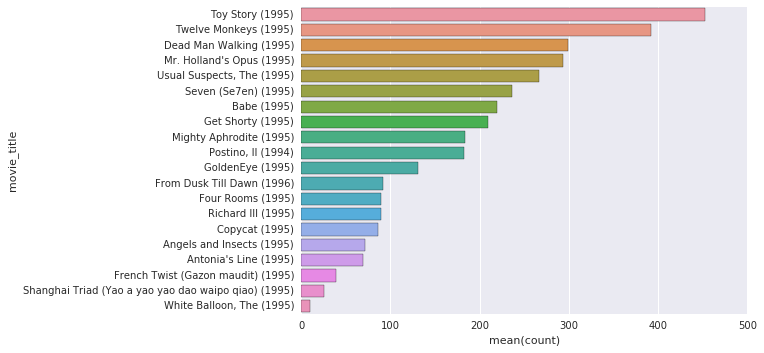

In [48]:
sns.barplot(x='count', y='movie_title', data=movies[movies.index<=20], orient="V")

Use `pandas.concat` to add another column to the movies `DataFrame`, named `rating` that contains the average rating for that movie.

In [49]:
rates = pd.DataFrame([ratings[ratings['movie_id']==ele]['rating'].mean() for ele in movies.index],
                     columns=['rating'],
                     index=movies.index)

In [50]:
frames=[movies,rates]

In [51]:
movies=pd.concat(frames)

In [52]:
movies = movies.drop_duplicates(subset='movie_title', take_last=True)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


In [53]:
movies['rating']=rates

In [54]:
movies=movies[list(['movie_title','year','count','rating'])]

In [55]:
movies.head()

,movie_title,year,count,rating
movie_id,,,,
50,Star Wars (1977),(1977),583,4.358491
258,Contact (1997),(1997),509,3.803536
100,Fargo (1996),(1996),508,4.155512
181,Return of the Jedi (1983),(1983),507,4.007890
294,Liar Liar (1997),(1997),485,3.156701


In [56]:
assert list(movies.columns)==['movie_title','year','count','rating']

Make an appropriately labeled Seaborn `stripplot` with the mean rating on the x-axis and the `movie_title` on the y-axis. Order the movies by their mean rating and only show the top 30 movies. Only show a grid for the y-axis.

In [57]:
movies=movies.sort_values("rating", ascending=False)

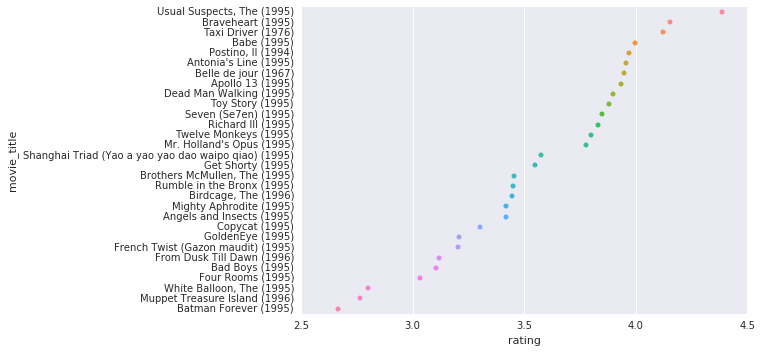

In [58]:
sns.stripplot(x="rating", y="movie_title", data=movies[movies.index<=30])

Explore the relationship between the number of reviews for a movie and its mean rating using a Seaborn `jointplot`:

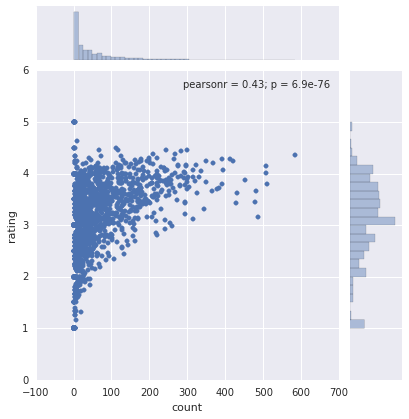

In [59]:
sns.jointplot(x="count", y="rating", data=movies)

Compute the mean rating grouped by the year and use Seaborn's `regplot` to perform a bootstrapped linear regression of the `rating` against the `year` (you will have to read the documentation for `regplot` carefully). The idea here is to explore how the average rating evolves over time.

In [60]:
grouped = movies.groupby('year')

In [61]:
movies['year'] = movies['year'].str.strip('(')

In [62]:
movies['year'] = movies['year'].str.strip(')')

In [63]:
movies['year'] = movies['year'].replace(to_replace=['','unknown'],value=np.nan)

In [64]:
movies['year']=movies[movies['year']!=np.nan].astype('int64')

ValueError: invalid literal for int() with base 10: 'Great Day in Harlem, A (1994)'

In [ ]:
sns.regplot(x="rating", y="year", data=movies,ci=movies['rating'],n_boot=1000)